In [28]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/Shalini Maurya/Desktop/dataset/mashroom.csv")

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

In [11]:
df.shape

(8124, 23)

In [14]:
md=pd.DataFrame(df)
md

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [15]:
#now we will see the data type of all the above mentioned column
md.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [16]:
#now lets check if there is any null value available
md.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
md.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
ms=md.copy()


le=LabelEncoder()
list1=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

for i in list1:
    ms[i]=le.fit_transform(ms[i])
ms


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [21]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [22]:
ms['class'].unique()

array([1, 0])

In [23]:
ms['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

# Univariate analysis

<AxesSubplot:xlabel='class', ylabel='count'>

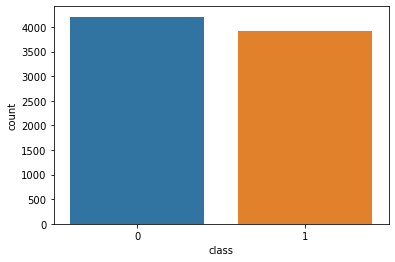

In [29]:
sn.countplot(ms['class'])


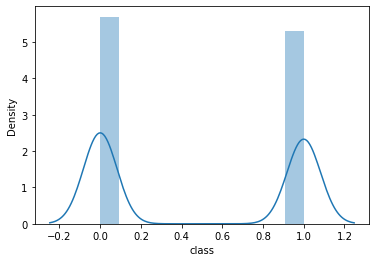

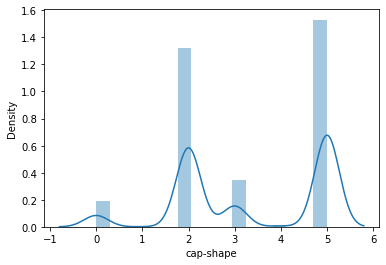

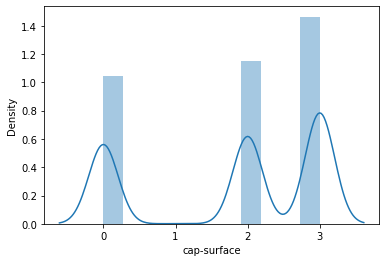

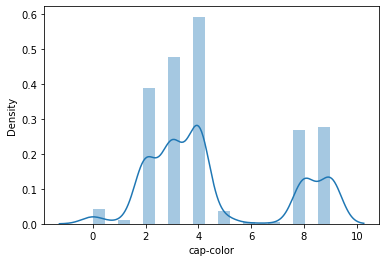

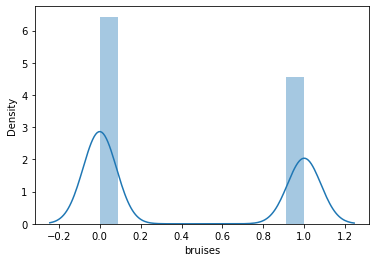

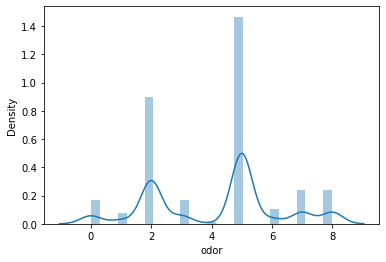

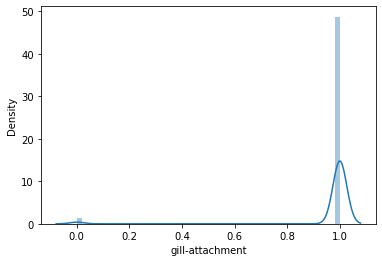

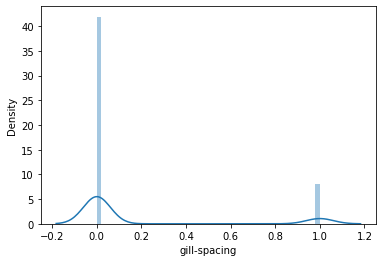

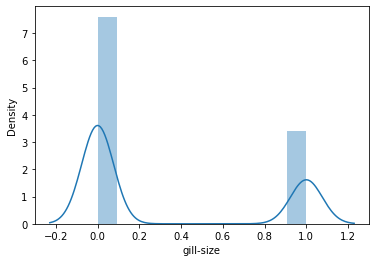

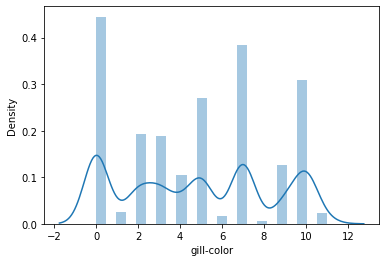

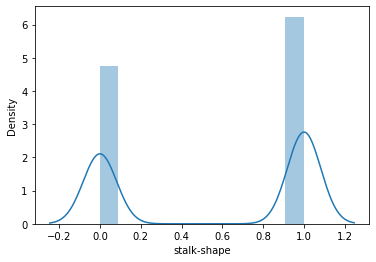

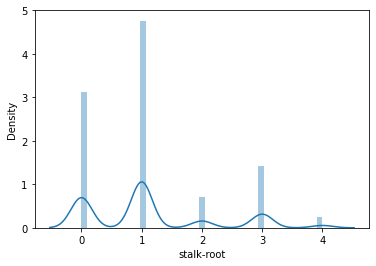

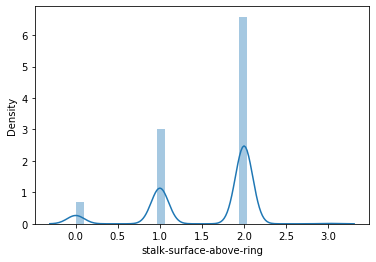

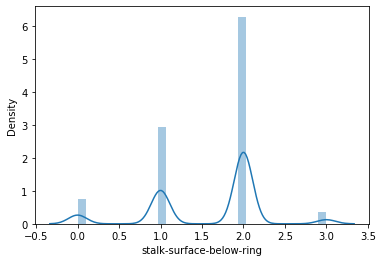

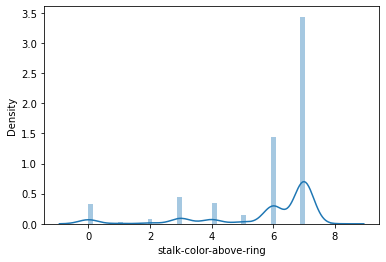

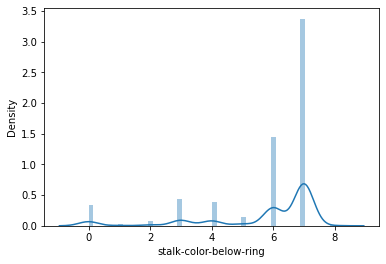

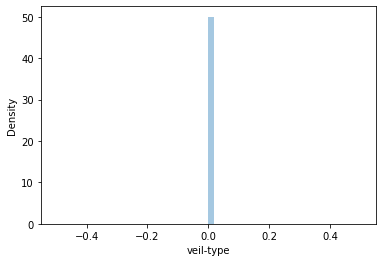

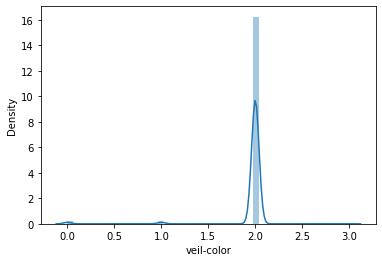

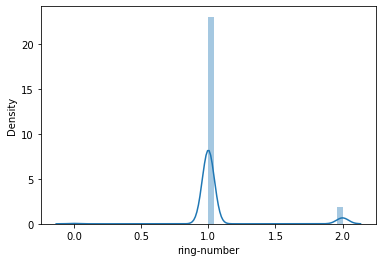

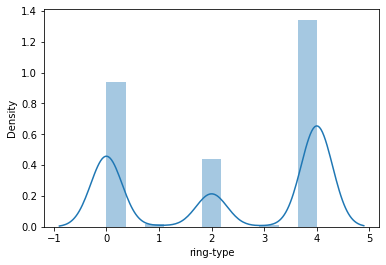

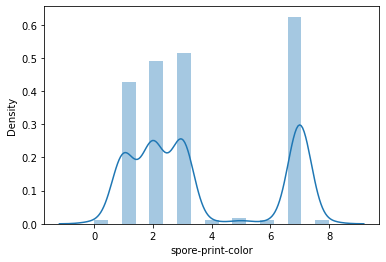

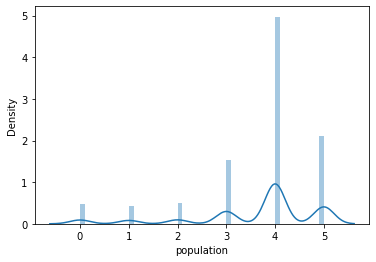

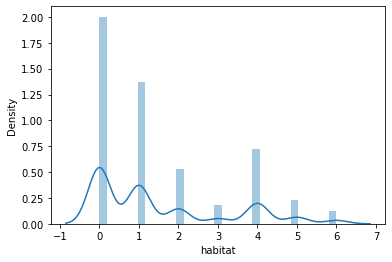

In [30]:
for i in ms.columns:
    plt.figure()
    sn.distplot(ms[i])

# Multivairate Analysis

<AxesSubplot:>

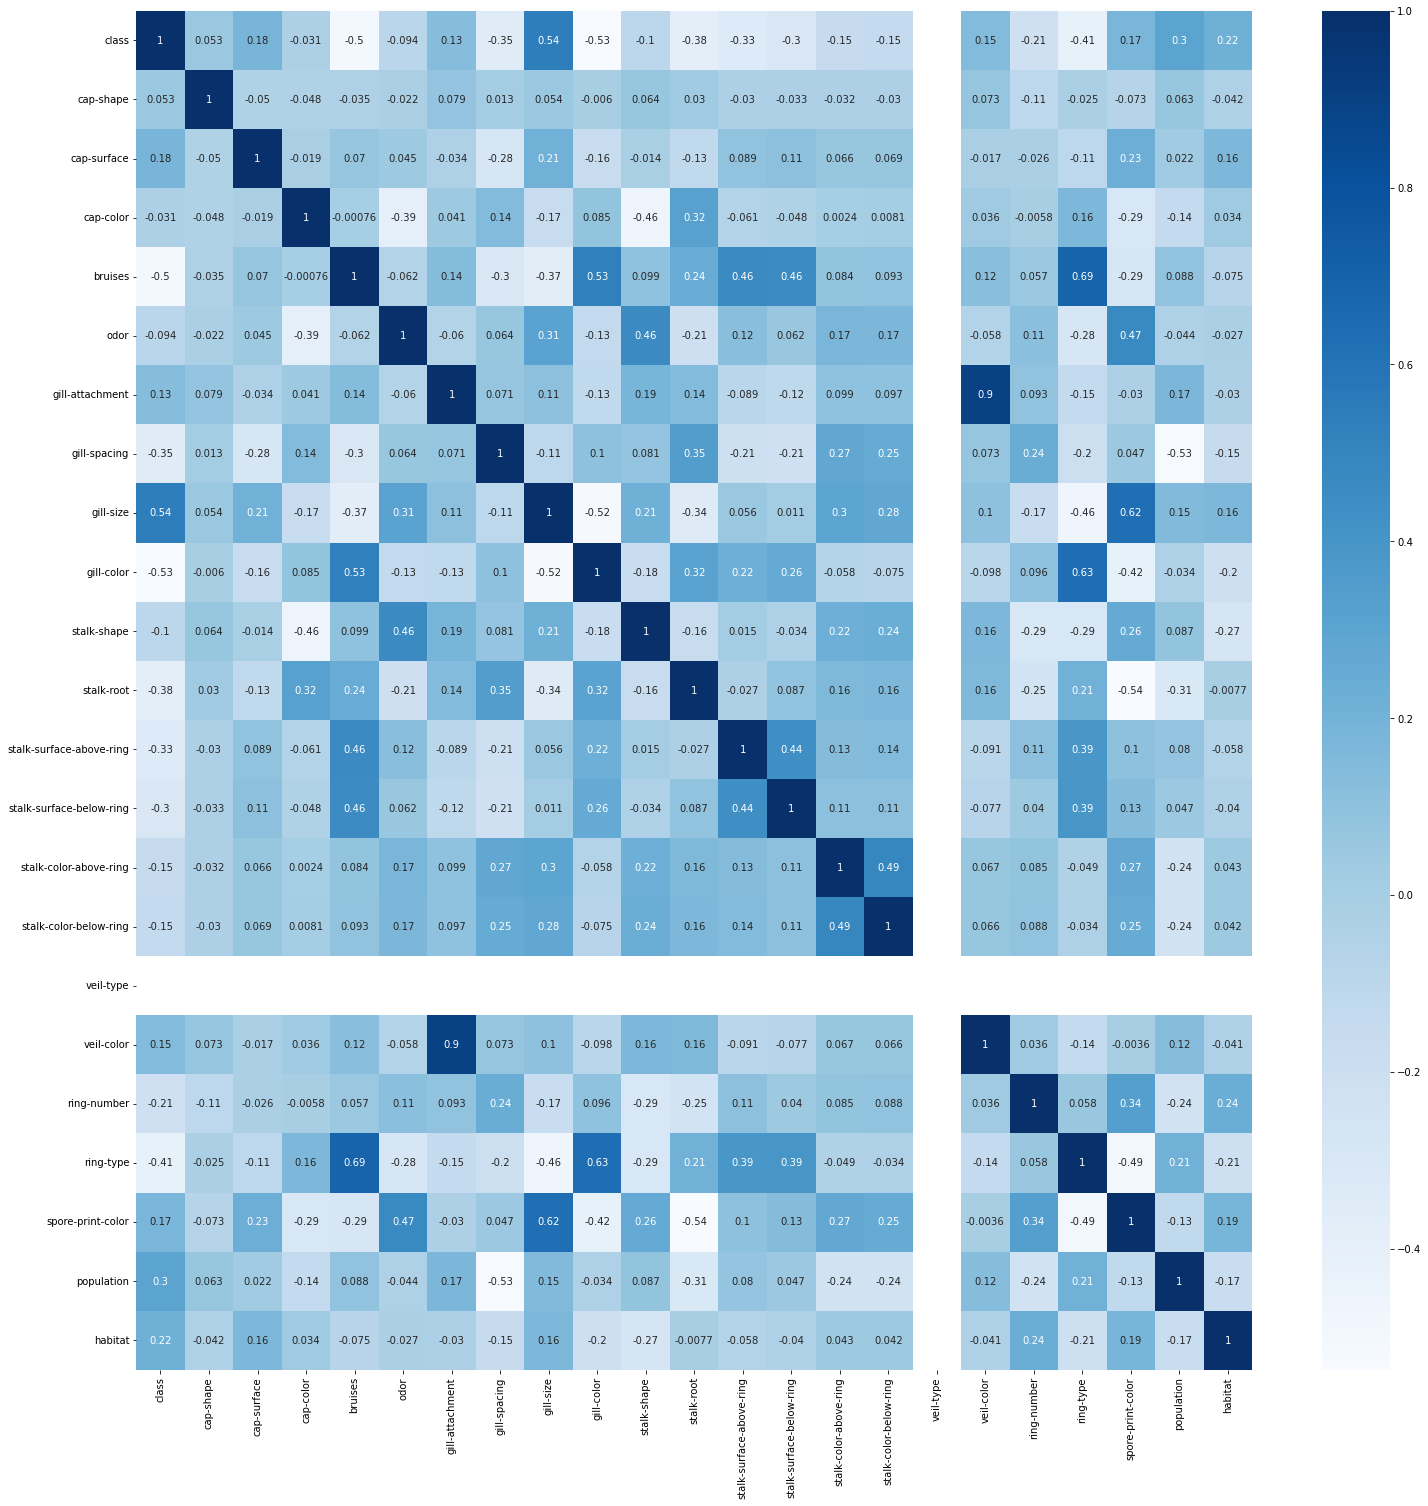

In [31]:
plt.figure(figsize=(25,25))
sn.heatmap(ms.corr(),annot=True,cmap='Blues')

In [32]:
ms['veil-type'].unique()

array([0])

In [33]:
ms=ms.drop(columns=['veil-type'])
ms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


# Outliers

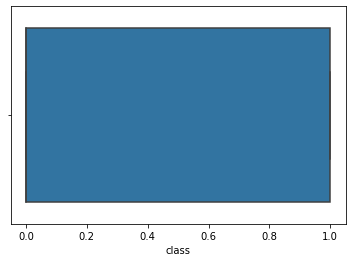

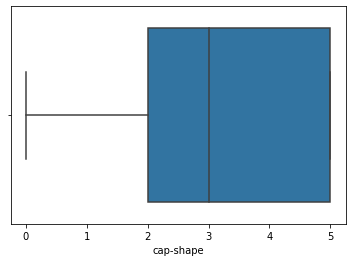

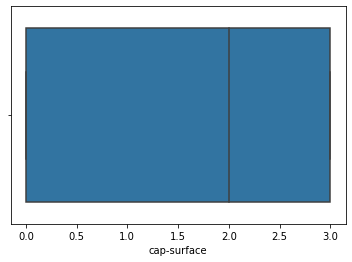

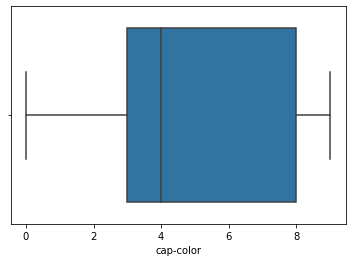

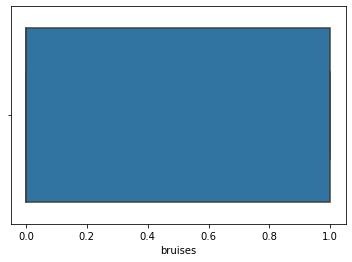

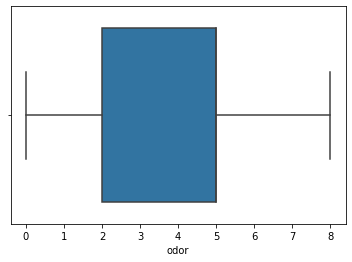

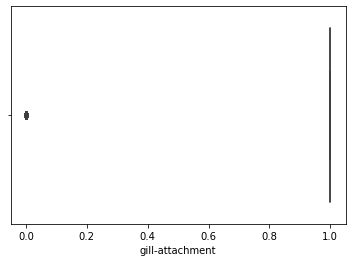

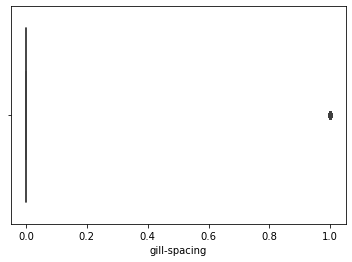

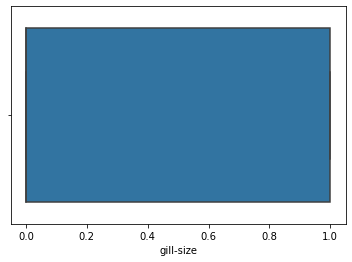

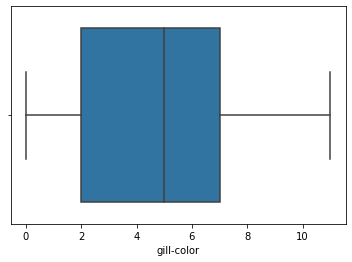

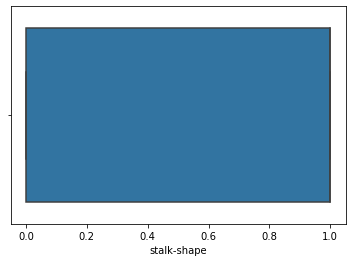

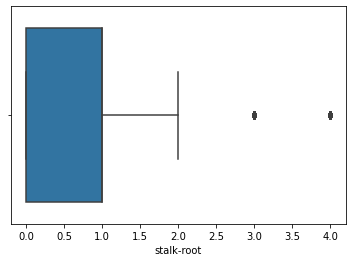

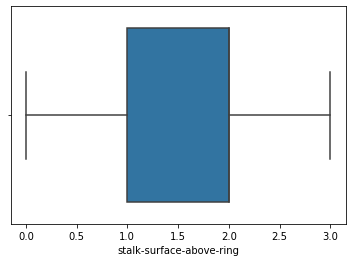

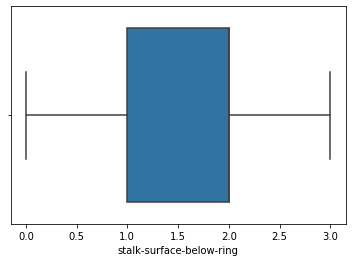

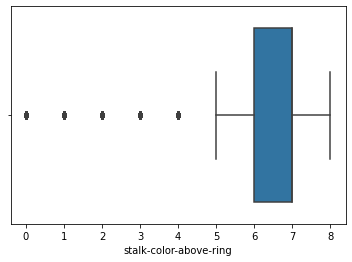

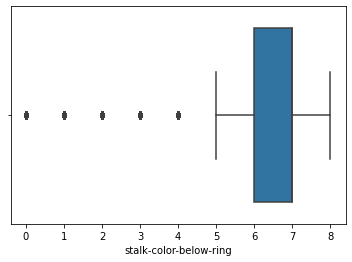

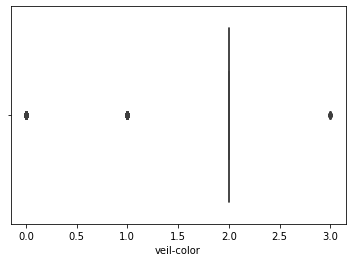

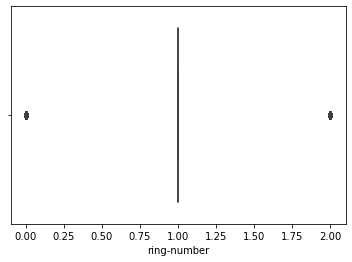

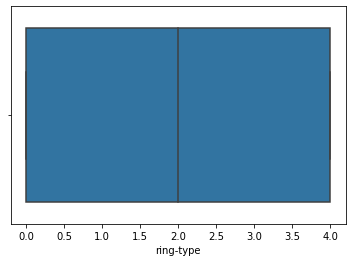

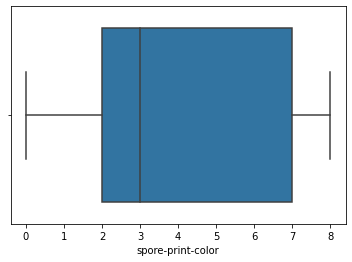

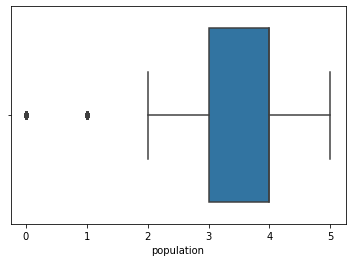

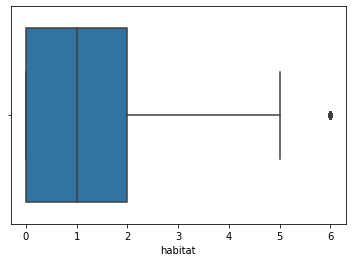

In [34]:
for i in ms.columns:
    plt.figure()
    sn.boxplot(ms[i])

In [35]:
#Removing outliers
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(ms))
z

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.036613,1.029712,0.140128,0.198250,1.185917,0.881938,0.162896,0.438864,1.494683,0.228998,...,0.683778,0.586385,0.622441,0.631991,0.142037,0.256132,0.948081,0.670195,0.514389,2.030028
1,0.964680,1.029712,0.140128,1.765874,1.185917,1.970316,0.162896,0.438864,0.669038,0.228998,...,0.683778,0.586385,0.622441,0.631991,0.142037,0.256132,0.948081,0.250471,1.313108,0.295730
2,0.964680,2.087047,0.140128,1.373049,1.185917,0.544189,0.162896,0.438864,0.669038,0.053477,...,0.683778,0.586385,0.622441,0.631991,0.142037,0.256132,0.948081,0.250471,1.313108,0.867149
3,1.036613,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,0.438864,1.494683,0.053477,...,0.683778,0.586385,0.622441,0.631991,0.142037,0.256132,0.948081,0.670195,0.514389,2.030028
4,0.964680,1.029712,0.140128,0.591075,0.843230,0.406562,0.162896,2.278612,0.669038,0.228998,...,0.683778,0.586385,0.622441,0.631991,0.142037,0.256132,1.272216,0.250471,2.910546,0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.964680,0.216992,0.140128,0.198250,0.843230,0.406562,6.138869,0.438864,0.669038,1.748325,...,0.683778,0.586385,0.429288,0.416681,3.979055,0.256132,0.948081,1.509643,2.111827,0.285710
8120,0.964680,1.029712,0.140128,0.198250,0.843230,0.406562,6.138869,0.438864,0.669038,1.748325,...,0.683778,0.586385,0.429288,0.416681,8.100146,0.256132,0.948081,1.509643,0.284330,0.285710
8121,0.964680,0.840343,0.140128,0.198250,0.843230,0.406562,6.138869,0.438864,0.669038,0.053477,...,0.683778,0.586385,0.429288,0.416681,3.979055,0.256132,0.948081,1.509643,2.111827,0.285710
8122,1.036613,0.216992,0.953270,0.198250,0.843230,1.832689,0.162896,0.438864,1.494683,1.358896,...,0.683778,0.893053,0.622441,0.631991,0.142037,0.256132,1.272216,1.428426,0.284330,0.285710


In [37]:
ms_new=ms[(z<3).all(axis=1)]

In [38]:
ms_new.shape

(6568, 22)

In [39]:
ms.shape

(8124, 22)

In [40]:
((8124-6568)/8124)*100

19.15312653865091

# Checking for skewness

In [41]:
ms.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [44]:
ms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [45]:
list1=['cap-surface', 'cap-color',
       'gill-attachment', 'gill-spacing', 'gill-size',
      'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'spore-print-color', 'population', 'habitat']

from sklearn.preprocessing import PowerTransformer

In [46]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)

for i in list1:
    ms[i]=pt.fit_transform(ms[i].values.reshape(-1,1))

In [48]:
ms.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.290018
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

In [49]:
ms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,0.050170,-0.026740,1,6,0.162896,-0.438864,1.494683,4,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,-0.537148,-0.800530,1.515489
1,0,5,0.050170,1.563194,1,0,0.162896,-0.438864,-0.669038,4,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,0.019064,-1.474856,0.116348
2,0,0,0.050170,1.305930,1,3,0.162896,-0.438864,-0.669038,5,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,0.019064,-1.474856,1.066339
3,1,5,0.998646,1.305930,1,6,0.162896,-0.438864,1.494683,5,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,-0.537148,-0.800530,1.515489
4,0,5,0.050170,-0.490015,0,5,0.162896,2.278612,-0.669038,4,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0,0.019064,-2.108626,0.116348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,0.050170,-0.026740,0,5,-6.138869,-0.438864,-0.669038,11,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,4,-2.806195,-1.898575,0.702479
8120,0,5,0.050170,-0.026740,0,5,-6.138869,-0.438864,-0.669038,11,...,0.708807,0.553899,-0.939926,-0.902249,-5.190986,-0.200377,4,-2.806195,0.154124,0.702479
8121,0,2,0.050170,-0.026740,0,5,-6.138869,-0.438864,-0.669038,5,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,4,-2.806195,-1.898575,0.702479
8122,1,3,0.998646,-0.026740,0,8,0.162896,-0.438864,1.494683,0,...,0.708807,-0.994621,0.765581,0.769774,0.098221,-0.200377,0,1.298625,0.154124,0.702479


In [50]:
y=ms.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [51]:
x=ms.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,0.050170,-0.026740,1,6,0.162896,-0.438864,1.494683,4,0,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,-0.537148,-0.800530,1.515489
1,5,0.050170,1.563194,1,0,0.162896,-0.438864,-0.669038,4,0,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,0.019064,-1.474856,0.116348
2,0,0.050170,1.305930,1,3,0.162896,-0.438864,-0.669038,5,0,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,0.019064,-1.474856,1.066339
3,5,0.998646,1.305930,1,6,0.162896,-0.438864,1.494683,5,0,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,4,-0.537148,-0.800530,1.515489
4,5,0.050170,-0.490015,0,5,0.162896,2.278612,-0.669038,4,1,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0,0.019064,-2.108626,0.116348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,0.050170,-0.026740,0,5,-6.138869,-0.438864,-0.669038,11,0,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,4,-2.806195,-1.898575,0.702479
8120,5,0.050170,-0.026740,0,5,-6.138869,-0.438864,-0.669038,11,0,...,0.708807,0.553899,-0.939926,-0.902249,-5.190986,-0.200377,4,-2.806195,0.154124,0.702479
8121,2,0.050170,-0.026740,0,5,-6.138869,-0.438864,-0.669038,5,0,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,4,-2.806195,-1.898575,0.702479
8122,3,0.998646,-0.026740,0,8,0.162896,-0.438864,1.494683,0,1,...,0.708807,-0.994621,0.765581,0.769774,0.098221,-0.200377,0,1.298625,0.154124,0.702479


In [52]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_sc=accuracy_score(y_test,pred)
    if acc_sc>maxacc:
        maxacc=acc_sc
        maxrs=i
print('best acc_sc is:',maxacc,' at random state', maxrs)

best acc_sc is: 1.0  at random state 1


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [54]:
x_train.shape

(5686, 21)

In [55]:
x_test.shape

(2438, 21)

In [56]:
y_train.shape

(5686,)

In [57]:
y_test.shape

(2438,)

# Modal Training

In [58]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [59]:
model=[lg,dtc,knn,sv,gnb,rfc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy_score:',accuracy_score(y_test,pred))
    print('confusion_matrix:',confusion_matrix(y_test,pred))
    print('classification_report:',classification_report(y_test,pred))
    cvscore=cross_val_score(m,x,y,cv=5)
    print(cvscore.mean())
    print('\n')

accuracy_score: 0.9487284659557014
confusion_matrix: [[1186   50]
 [  75 1127]]
classification_report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1236
           1       0.96      0.94      0.95      1202

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

0.8192619173929518


accuracy_score: 1.0
confusion_matrix: [[1236    0]
 [   0 1202]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

0.9202115953012505


accuracy_score: 1.0
confusion_matrix: [[1236    0]
 [   0 1202]]
classification_report:               precision  

# Hyper Parameter tuning

In [60]:
parameter={'max_depth':np.arange(2,10),'criterion':['gini','entropy']}

gcv=GridSearchCV(dtc,parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [61]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [62]:
parameter={'kernel':['rbf','poly','linear','sigmoid'],'gamma':['auto','scale']}

gcv=GridSearchCV(sv,parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [63]:
gcv.best_params_

{'gamma': 'auto', 'kernel': 'poly'}

In [64]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=7)
dtc.fit(x_train,y_train)
preddt=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,preddt))
print('confusion_matrix:',confusion_matrix(y_test,preddt))
print('classification_report:',classification_report(y_test,preddt))
cvscore=cross_val_score(dtc,x,y,cv=5)
print(cvscore.mean())

accuracy_score: 1.0
confusion_matrix: [[1236    0]
 [   0 1202]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

0.9753791587722622


In [65]:
sv=SVC(kernel='poly',gamma='auto',probability=True)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predsv))
print('confusion_matrix:',confusion_matrix(y_test,predsv))
print('classification_report:',classification_report(y_test,predsv))
cvscore=cross_val_score(sv,x,y,cv=5)
print(cvscore.mean())

accuracy_score: 1.0
confusion_matrix: [[1236    0]
 [   0 1202]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

0.8987881773399014


# AUC-ROC curve and score

In [66]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [67]:
# DTC Tree curve

pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

In [68]:
fpr

array([0., 0., 1.])

In [69]:
tpr

array([0., 1., 1.])

In [70]:
thresholds

array([2., 1., 0.])

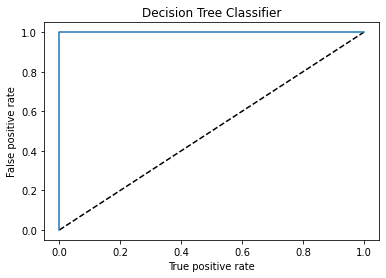

In [71]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [72]:
auc_score=roc_auc_score(y_test,preddt)
auc_score

1.0

In [73]:
# SVC curve and score

pred_prob=sv.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

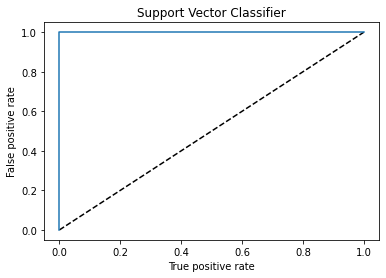

In [74]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support vector classifier')
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('Support Vector Classifier')
plt.show()

In [75]:
auc_score=roc_auc_score(y_test,predsv)
auc_score

1.0

# Saving the Best Modal

In [77]:
import joblib

In [78]:
joblib.dump(dtc,'mushroom_dtc.obj')

['mushroom_dtc.obj']